**Consistency Calculation Using One Sample for Correctly Predicted Negative Reviews and One for Correctly Predicted Positive Review**

This notebooks is refered to results in section **5.6.3.1** from the research document. 

**CONSISTENCY CALCULATION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import pandas as pd
import numpy as np
import random
from scipy.stats import pearsonr

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [ ]:
#read the table
df = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/reults_union', 'rb'))

In [ ]:
pos_i = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/positive_sample_50', 'rb'))
neg_i = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/negative_sample_50', 'rb')) 

In [ ]:
#function to check number of positive and number of negative features
def func_feature_imp (sample_sentence):
  pos_values = [el[0] for el in sample_sentence if el[1] > 0]
  neg_values = [el[0] for el in sample_sentence if el[1] < 0]
  return pos_values, neg_values

In [ ]:
def jaccard_similarity(list1, list2, list3):
    s1 = set(list1)
    s2 = set(list2)
    s3 = set(list3)
    r = (float(len(s1.intersection(s2)) / len(s1.union(s2)))+float(len(s1.intersection(s3)) / len(s1.union(s3)))+float(len(s2.intersection(s3)) / len(s2.union(s3))))/3
    return r

In [ ]:
def cons_score(cnn_l, lstm_l, bert_l, k): #k=0 for positive values, k=1 for negative values
  csl = [] #consistency score list
  for indx in range(50):
    cnn = func_feature_imp (cnn_l[indx])[k]
    lstm = func_feature_imp (lstm_l[indx])[k]
    bert = func_feature_imp (bert_l[indx])[k]
    js = jaccard_similarity(cnn, lstm, bert)
    csl.append(js)
  return csl


In [ ]:
#count the lengh of each explanation, for BERT might be different because of word piecing
def count_l(cnn_l, lstm_l, bert_l):
  a = []
  for indx in range(50):
    r = (len(cnn_l[indx]) + len(lstm_l[indx]) + len(bert_l[indx]))/3
    a.append(r)
  return a
 

**LIME**

In [ ]:
cnn_pos = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/lime_cnn_positive_sample_50', 'rb'))
lstm_pos = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/lime_lstm_positive_sample_50', 'rb'))
bert_pos = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/lime_bert_positive_sample_50', 'rb'))

In [ ]:
l = count_l(cnn_pos, lstm_pos, lstm_pos)
r_pos_lime = cons_score(cnn_pos, lstm_pos, bert_pos, 0)
print('Average consistency score:', sum(r_pos_lime)/50)

Average consistency score: 0.47935507364225827


In [ ]:
print(min(r_pos_lime), max(r_pos_lime))

0.22469135802469134 0.6611111111111111


Pearson Coef.: (-0.3707485581728922, 0.008037948776125032)


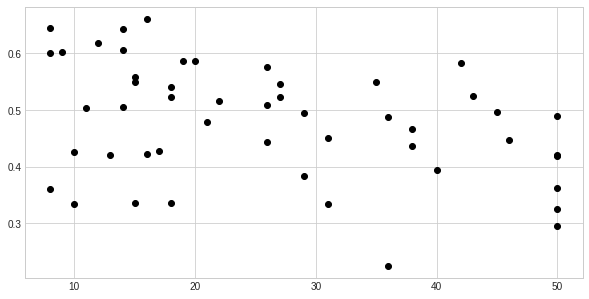

In [ ]:
plt.figure(figsize=(10,5))
x = l
y = r_pos_lime
plt.plot(x, y, 'o', color='black');

print('Pearson Coef.:',pearsonr(x, y))

In [ ]:
cnn_neg = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/lime_cnn_negative_sample_50', 'rb'))
lstm_neg = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/lime_lstm_negative_sample_50', 'rb'))
bert_neg = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/lime_bert_negative_sample_50', 'rb'))

In [ ]:
l = count_l(cnn_neg, lstm_neg, lstm_neg)
r_neg_lime = cons_score(cnn_neg, lstm_neg, bert_neg, 1)
print('Average consistency score:', sum(r_neg_lime)/50)

Average consistency score: 0.45921091505702755


In [ ]:
print(min(r_neg_lime), max(r_neg_lime))

0.17853714449459132 0.6431683784624961


Pearson Coef.: (-0.6845449780290019, 4.2108701622219356e-08)


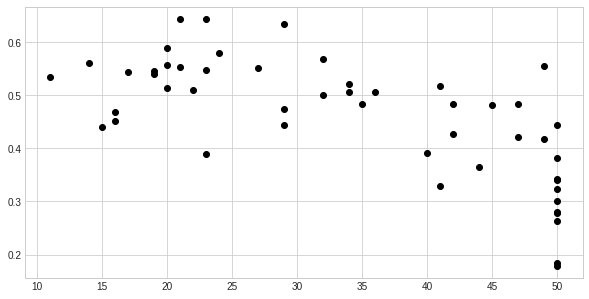

In [ ]:
plt.figure(figsize=(10,5))
x = l
y = r_neg_lime
plt.plot(x, y, 'o', color='black');

print('Pearson Coef.:',pearsonr(x, y))

**SHAP**

In [ ]:
cnn_pos = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/shap_cnn_final_list_pos', 'rb'))
lstm_pos = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/shap_lstm_final_list_pos', 'rb'))
bert_pos = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/bert_shap_positive_sample_50', 'rb'))


cnn_neg = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/shap_cnn_final_list_neg', 'rb'))
lstm_neg = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/shap_lstm_final_list_neg', 'rb'))
bert_neg = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/bert_shap_negative_sample_50', 'rb'))

In [ ]:
l = count_l(cnn_pos, lstm_pos, lstm_pos)
r_pos_shap = cons_score(cnn_pos, lstm_pos, bert_pos, 0)
print('Average consistency score:', sum(r_pos_shap)/50)

Average consistency score: 0.4869982818145269


In [ ]:
print(min(r_pos_shap), max(r_pos_shap))

0.32037037037037036 0.6259235578289287


Pearson Coef.: (0.009895686010135081, 0.9456225497879847)


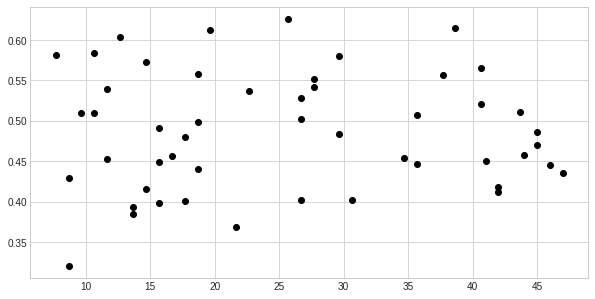

In [ ]:
plt.figure(figsize=(10,5))
x = l
y = r_pos_shap
plt.plot(x, y, 'o', color='black');

print('Pearson Coef.:',pearsonr(x, y))

In [ ]:
l = count_l(cnn_neg, lstm_neg, lstm_neg)
r_neg_shap = cons_score(cnn_neg, lstm_neg, bert_neg, 1)
print('Average consistency score:', sum(r_neg_shap)/50)

Average consistency score: 0.49923982748352924


In [ ]:
print(min(r_neg_shap), max(r_neg_shap))

0.3543925821153544 0.7254901960784315


Pearson Coef.: (-0.4183019255937821, 0.002503055884178354)


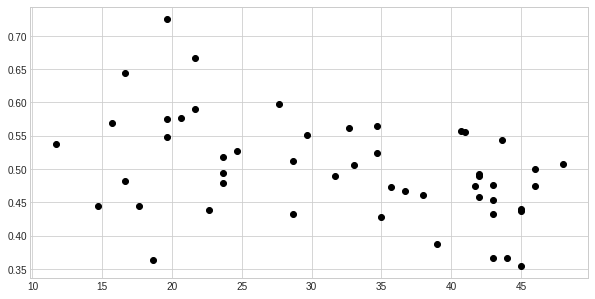

In [ ]:
plt.figure(figsize=(10,5))
x = l
y = r_neg_shap
plt.plot(x, y, 'o', color='black')

print('Pearson Coef.:',pearsonr(x, y))

**IG**

In [ ]:
cnn_pos = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/ig_cnn_final_list_pos', 'rb'))
lstm_pos = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/ig_lstm_final_list_pos', 'rb'))
bert_pos = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/ig_bert_final_list_pos', 'rb'))

In [ ]:
cnn_neg = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/ig_cnn_final_list_neg', 'rb'))
lstm_neg = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/ig_lstm_final_list_neg', 'rb'))
bert_neg = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/ig_bert_final_list_neg', 'rb'))

In [ ]:
l = count_l(cnn_pos, lstm_pos, lstm_pos)
r_pos_ig = cons_score(cnn_pos, lstm_pos, bert_pos, 0)
print('Average consistency score:', sum(r_pos_ig)/50)

Average consistency score: 0.3974061600218343


In [ ]:
print(min(r_pos_ig), max(r_pos_ig))

0.14007936507936508 0.7296296296296295


Pearson Coef.: (-0.4962093114985667, 0.00024757927598633437)


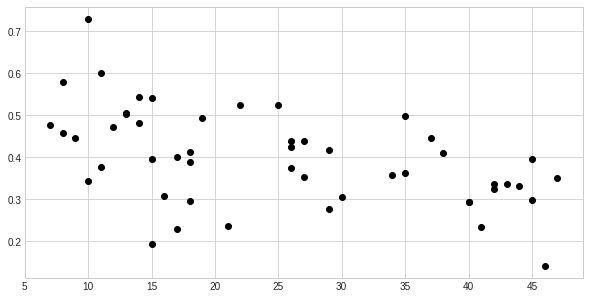

In [ ]:
plt.figure(figsize=(10,5))
x = l
y = r_pos_ig
plt.plot(x, y, 'o', color='black');

print('Pearson Coef.:',pearsonr(x, y))

In [ ]:
l = count_l(cnn_neg, lstm_neg, lstm_neg)
r_neg_ig = cons_score(cnn_neg, lstm_neg, bert_neg, 0)
print('Average consistency score:', sum(r_neg_ig)/50)

Average consistency score: 0.39431549025323265


In [ ]:
print(min(r_neg_ig), max(r_neg_ig))

0.1495995995995996 0.5685436567789509


Pearson Coef.: (-0.457104863462496, 0.0008465391617722367)


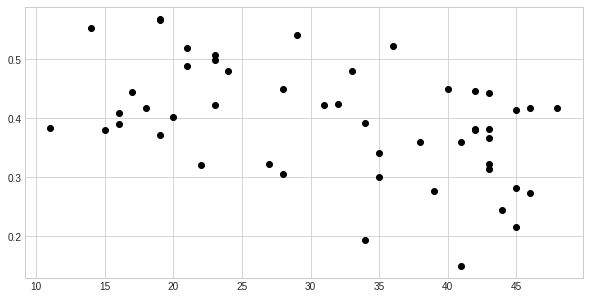

In [ ]:
plt.figure(figsize=(10,5))
x = l
y = r_neg_ig
plt.plot(x, y, 'o', color='black')

print('Pearson Coef.:',pearsonr(x, y))